In [1]:
import svgpathtools
import numpy as np
import matplotlib.pyplot as plt
import pickle
%cd ./data/

/home/z/Dropbox (OIST)/code/python/pytorch/deep_explorations/rnn/data


In [2]:
def coords_from_svg(svg_file:str) -> np.array:
    """ Extract coordinates of the paths in an svg file.

        The coordinates will be normalized to have zero mean and
        standard deviation of roughly 1 while keeping the X/Y proportions.
        Also, the Y axis will be reversed.

        Args:
            svg_file: path/name of the svg file
        Returns:
            List of Numpy arrays. Each array will have shape (k,2), where
            the rows correspond to different points, and the columns 
            correspond to the X, Y coordinates.
    """
    # extracting
    paths, attributes = svgpathtools.svg2paths(svg_file)
    path_coordinates = []
    for path in paths:
        curr_path = []
        for segment in path:
            if isinstance(segment, svgpathtools.Line):
                start = segment.start.real, segment.start.imag
                end = segment.end.real, segment.end.imag
                curr_path.extend([start, end])
            elif isinstance(segment, svgpathtools.CubicBezier):
                start = segment.start.real, segment.start.imag
                control1 = segment.control1.real, segment.control1.imag
                control2 = segment.control2.real, segment.control2.imag
                end = segment.end.real, segment.end.imag
                curr_path.extend([start, control1, control2, end])
        path_coordinates.append(np.array(curr_path))
    # normalizing
    for path in path_coordinates:
        path -= path.mean(axis=0)
        path[:, 1] = -path[:, 1]
        path[:] = path / (0.5 * path.std(axis=0).sum() +  1e-12)
        
    return path_coordinates

def limit_length(coords:np.array, max_len:int) -> np.array:
    """ Limit the length of an input array using stradded sampling.
    
        Args:
            coords: array of size (k, 2)
            max_len: maximum length (first dimension size) for output
        Returns:
            coords[::j, :], where j is the smallest stride size that still
            allows the output to have length smaller than max_len.
    """
    k, c = coords.shape
    j = int(np.ceil(k / max_len))
    return coords[::j]

In [3]:
# parameters
max_n_points = 1000
# svg_filename = 'circle2_triangle2_eight2_random.svg'
svg_filename = 'one_side.svg'

# load data
coords_list = coords_from_svg(svg_filename)

# limit number of data points
coords = limit_length(coords_list[1], max_n_points)

# save Numpy array
pkl_filename = svg_filename[:-4] + '.pkl'
with open(pkl_filename, 'wb') as f:
    pickle.dump(coords, f)

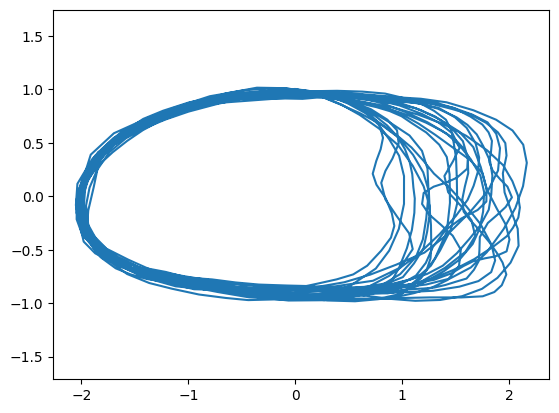

In [4]:
# plot
fig = plt.figure()
plt.axis('equal')
plt.plot(coords[:,0], coords[:,1])

In [ ]:
# load a saved array
fname = 'eye.pkl'
with open(fname, 'rb') as f:
    loaded = pickle.load(f)

In [ ]:
# plot the loaded array
fig = plt.figure()
plt.axis('equal')
plt.plot(loaded[:,0], loaded[:,1])